In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer

In [3]:
Spam_df = pd.read_csv("SMSSpamCollection.txt", sep='\t', header=None, names=['label', 'message'])
Spam_df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [22]:
#create features and labels
# e.g length of message, number of capital letters
# create X matrix from 3-4 features created
Spam_df['message_Length'] = Spam_df['message'].str.len()
Spam_df['capitals'] = Spam_df['message'].str.count(r'[A-Z]')
Spam_df['numbers'] = Spam_df['message'].str.count(r'[0-9]')
X = Spam_df[['message_Length', 'capitals', 'numbers']]
X

,message_Length,capitals,numbers
0,111,3,0
1,29,2,0
2,155,10,25
3,49,2,0
4,61,2,0
...,...,...,...
5567,160,9,21
5568,36,1,0
5569,57,2,0
5570,125,2,0


In [23]:
#convert labels to 0 and 1
y = Spam_df['label'].map({'ham': 0, 'spam': 1})
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [24]:
#partition the dataset into a training set and testing set 
#using train_test_split
#allocate 20% data for testing and random_state to 419
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=419)

In [35]:
#fit KNN classifier to training data using KNeighborsClassifier
#use default parameters
#find default k value
#report accuravy on training and testing sets
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, knn.predict(X_train))
accuracy_test = accuracy_score(y_test, knn.predict(X_test))
accuracy_train
accuracy_test

0.9757847533632287

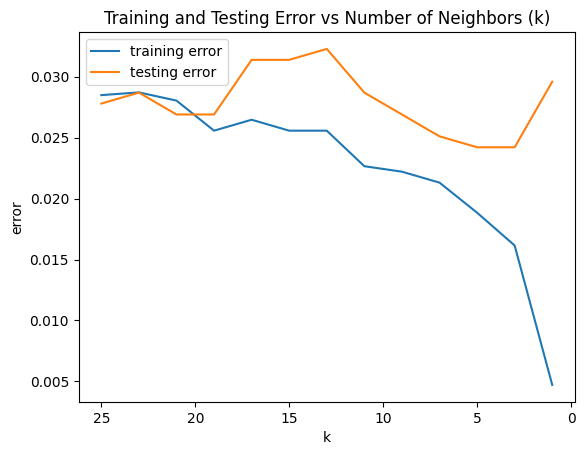

In [36]:
#generate plot of training and testing error as functions of k (n_neighbors)
#consider only odd values of k from 1-25 (1 - accuracy)
ks = list(range(1, 26, 2))
train_error = [1 - accuracy_score(y_train, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_train)) for k in ks]
test_error = [1 - accuracy_score(y_test, KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_test)) for k in ks]
fig, ax = plt.subplots()
ax.plot(ks, train_error, label='training error')
ax.plot(ks, test_error, label='testing error')
ax.set_xlabel('k')
ax.set_ylabel('error')
ax.legend()
ax.invert_xaxis()
plt.title("Training and Testing Error vs Number of Neighbors (k)")
plt.show()

In [38]:
#recommend value of k for final model w rationale for choice
min_test_error_index = np.argmin(test_error)
optimal_k = ks[min_test_error_index]
print("Optimal k:", optimal_k)

Optimal k: 3


In [4]:
#Problem 8
#load in data
brazil_df = pd.read_csv("Brazil_rents_sm.csv", sep=',')
brazil_df = pd.DataFrame(brazil_df)
brazil_df

,log_rent,log_area,sqrt_hoa,rooms,furnished,bathroom,animal_accept
0,8.771835,5.298317,0.000000,4.0,0,5.0,1
1,8.714568,5.521461,0.000000,7.0,1,5.0,1
2,7.675082,4.174387,17.320508,1.0,0,1.0,1
3,9.678467,6.173786,0.000000,4.0,0,5.0,1
4,7.446585,4.007333,17.320508,2.0,0,1.0,1
...,...,...,...,...,...,...,...
4995,6.833032,3.761200,14.106736,2.0,0,1.0,1
4996,8.878637,5.117994,36.262929,3.0,0,3.0,1
4997,6.633318,2.708050,7.071068,1.0,0,1.0,1
4998,8.967759,5.480639,52.915026,4.0,0,4.0,1


In [14]:
#use entire dataset to fit KNN regression model w k=10 using KNeighborsRegressor
#report RMSE on training
X = brazil_df.drop('log_rent', axis=1)
y = brazil_df['log_rent']
# X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=419)
knn_R = KNeighborsRegressor(n_neighbors=10)
knn_R.fit(X, y)
y_pred = knn_R.predict(X)
np.sqrt(mean_squared_error(y, y_pred))

0.32944334153283117

In [10]:
#use 5-fold cross validation to estimate generalizeable RMSE
#report mean RMSE
rmse_score = np.sqrt(cross_val_score(knn_R, X, y, cv=5, scoring=make_scorer(mean_squared_error)))
np.mean(rmse_score)

0.36673055122181125

In [8]:
# further estimate the generalizable RMSE using leave-one-out, 
#10-fold, 20-fold, and 50-fold cross-validation
leave_out = np.sqrt(cross_val_score(knn_R, X, y, cv=LeaveOneOut(), scoring=make_scorer(mean_squared_error)))

tenfold = np.sqrt(cross_val_score(knn_R, X, y, cv=10, scoring=make_scorer(mean_squared_error)))
fiftyfold = np.sqrt(cross_val_score(knn_R, X, y, cv=50, scoring=make_scorer(mean_squared_error)))
twentyfold = np.sqrt(cross_val_score(knn_R, X, y, cv=20, scoring=make_scorer(mean_squared_error)))
print(f"Mean and SD of Leave One Out: {np.mean(leave_out)}, {np.std(leave_out)}")
print(f"Mean and SD of 10-fold: {np.mean(tenfold)}, {np.std(tenfold)}")
print(f"Mean and SD of 50-fold: {np.mean(fiftyfold)}, {np.std(fiftyfold)}")
print(f"Mean and SD of 20-fold: {np.mean(twentyfold)}, {np.std(twentyfold)}")
# compare mean and sd of errors for each technique, including 5-fold
#summarize in plot or table w number of folds, mean error, and sd
print(tenfold)

Mean and SD of Leave One Out: 0.28329434076050597, 0.2308290971820908
Mean and SD of 10-fold: 0.36534446603094045, 0.014805604315608166
Mean and SD of 50-fold: 0.36318039202610286, 0.03614862505124108
Mean and SD of 20-fold: 0.3650529851768482, 0.021672086290301543
[0.39051739 0.37112073 0.34330057 0.39085971 0.36283271 0.35167229
 0.35765056 0.36482375 0.35380923 0.36685773]


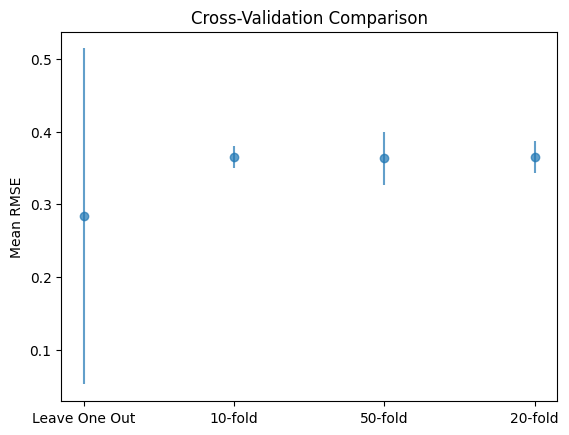

In [11]:

leave_out_mean, leave_out_std = np.mean(leave_out), np.std(leave_out)
tenfold_mean, tenfold_std = np.mean(tenfold), np.std(tenfold)
fiftyfold_mean, fiftyfold_std = np.mean(fiftyfold), np.std(fiftyfold)
twentyfold_mean, twentyfold_std = np.mean(twentyfold), np.std(twentyfold)
fivefold_mean, fivefold_std = np.mean(rmse_score), np.std(rmse_score)
labels = ['Leave One Out', '10-fold', '50-fold', '20-fold']
means = [leave_out_mean, tenfold_mean, fiftyfold_mean, twentyfold_mean]
stds = [leave_out_std, tenfold_std, fiftyfold_std, twentyfold_std]
fig, ax = plt.subplots()
ax.errorbar(labels, means, yerr=stds, alpha=0.7, fmt='o')
ax.set_ylabel('Mean RMSE')
ax.set_title('Cross-Validation Comparison')
plt.show()

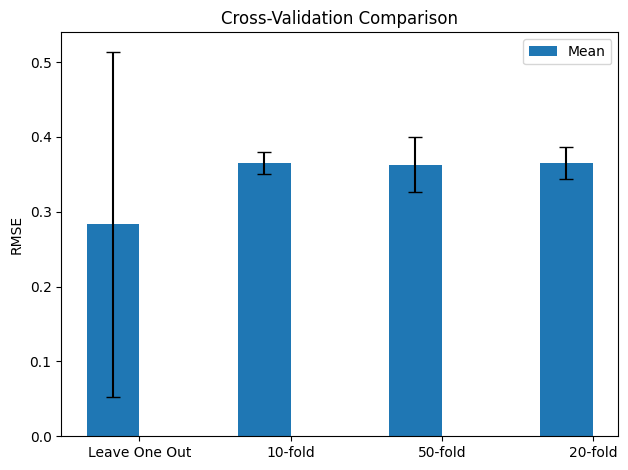

In [13]:
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means, width, label='Mean', yerr=stds, capsize=5)
ax.set_ylabel('RMSE')
ax.set_title('Cross-Validation Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [31]:
#partition dataset into training and testing sets
#use train_test_split
#allocate 20% for testing and random_state to 307
#report RMSE on training and testing sets
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2, random_state=307)
knn_R = KNeighborsRegressor(n_neighbors=10)
knn_R.fit(X_train_b, y_train_b)
y_pred = knn_R.predict(X_test_b)
rmse_1 = np.sqrt(mean_squared_error(y_test_b, y_pred))
print(rmse_1)

0.3710233604321221


In [29]:
#repeat above but with different training set (still 20%) and diff random_state
#report RMSE on training and testing sets
#discuss findings, draw comparisons between test error and cross-validated estimates
X_train_b_1, X_test_b_1, y_train_b_1, y_test_b_1 = train_test_split(X, y, test_size=0.2, random_state=210)
knn_R = KNeighborsRegressor(n_neighbors=10)
knn_R.fit(X_train_b_1, y_train_b_1)
y_pred = knn_R.predict(X_test_b_1)
rmse_2 = np.sqrt(mean_squared_error(y_test_b_1, y_pred))
print(rmse_2)

0.3607177244285942
